In [202]:
import os
import pdb
import numpy as np
import pandas as pd
from scipy import stats
from scipy.linalg import svd
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.core.display import HTML,display


# The dataset we choose
## 我们选择的数据集是人类活动数据集合HAPT Data Set

In [203]:
root_path = r'../HAPT Data Set/'
x_train_path = (os.path.join(root_path,"Train","X_train.txt")) # sample as row
y_train_path = os.path.join(root_path,"Train","y_train.txt") # each sample to avtivity label
x_test_path =  os.path.join(root_path,"Test","X_test.txt")
y_test_path = os.path.join(root_path,"Test","y_test.txt") 
feature_path = os.path.join(root_path,"features.txt") # -> attributes
activity_path = os.path.join(root_path,"activity_labels.txt") # -> Y-label

# Show attribute names
## 显示数据集的参数名称，每一行的数据的每个维度的现实意义

In [204]:
attributeNames = pd.read_csv(feature_path, header=None, sep='/n')
attri_map = np.reshape(attributeNames.values,(-1,len(attributeNames)))
attributeNames = attri_map.T.squeeze().tolist()
attributeNames

/opt/miniconda3/envs/course02450/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tGravityAcc-Mean-1',
 'tGravityAcc-Mean-2',
 'tGravityAcc-Mean-3',
 'tGravityAcc-STD-1',
 'tGravityAcc-STD-2',
 'tGravityAcc-STD-3',
 'tGravityAcc-M

# Show the head sixth rows of our training data 
## 显示数据集的前六行

In [205]:
# train dateset
x_train = pd.read_csv(x_train_path, header=None, sep='\s+')
x_train.columns = attributeNames
y_train = pd.read_csv(y_train_path, header=None, sep='\s+')

# test dataset
x_test = pd.read_csv(x_test_path, header=None, sep='\s+')
x_test.columns = attributeNames
y_test = pd.read_csv(y_test_path, header=None, sep='\s+')

# label map
classNames = pd.read_csv(activity_path, header=None, sep='\s+').values[:,1].squeeze().tolist()
print(classNames)

# acti_dict = { 1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
#               4: 'SITTING', 5: 'STANDING', 6: 'LAYING', 7: 'STAND_TO_SIT', 
#               8: 'SIT_TO_STAND', 9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND'}


acti_dict = {}
for i in range(len(map_acti)):
    key = int(map_acti.values[i][0])
    value = str(map_acti.values[i][1])
    acti_dict[key] = value

x_train = x_train.values # 7767*561
y_train = y_train.values # 7767*1

# split according to the acti from x_train
# split_acti: { key:value }
# key: activity numer
# value: the data from x_train according activity numer
split_acti = {}
for key,value in acti_dict.items():
    idx = np.where(key == y_train[:,0])
    split_acti[key] = x_train[idx[0]]
acti_dict

['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']


{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING',
 7: 'STAND_TO_SIT',
 8: 'SIT_TO_STAND',
 9: 'SIT_TO_LIE',
 10: 'LIE_TO_SIT',
 11: 'STAND_TO_LIE',
 12: 'LIE_TO_STAND'}

**Draw the outlier from 3 attributies**

(7767, 561) (7767,)


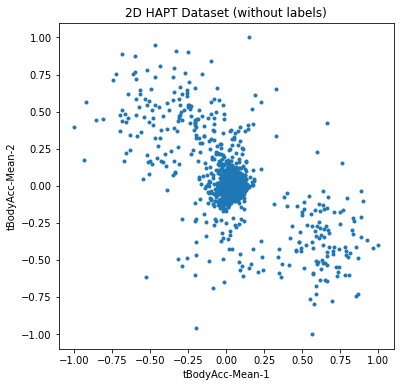

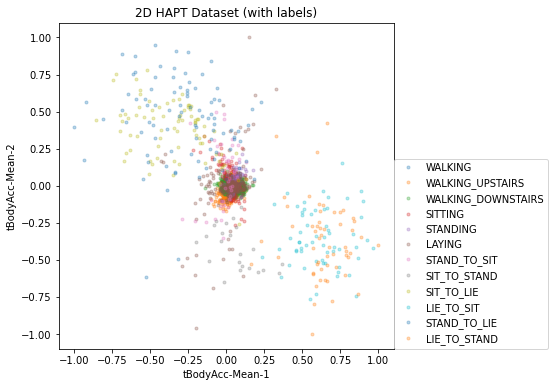

In [206]:
X = x_train
y = y_train.reshape(7767,)
print(X.shape, y.shape)
attributeNames = attributeNames
# classNames = [classNames[0],classNames[3],classNames[4],classNames[5]]# 1: 'WALKING',4: 'SITTING',5: 'STANDING',6: 'LAYING',
C = len(classNames) # 绘制前三种动作类型
# 选取两个属性画图
i, j = 0, 1
fig = plt.figure(figsize=(6,6))
plt.plot(X[:, i], X[:, j], '.')
plt.title('2D HAPT Dataset (without labels)')
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()
# 绘制用颜色区分分类的散点图
fig = plt.figure(figsize=(6,6))
plt.title('2D HAPT Dataset (with labels)')
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(X[class_mask,i], X[class_mask,j], '.',alpha=.3)
plt.legend(classNames,loc=[1, 0])
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()


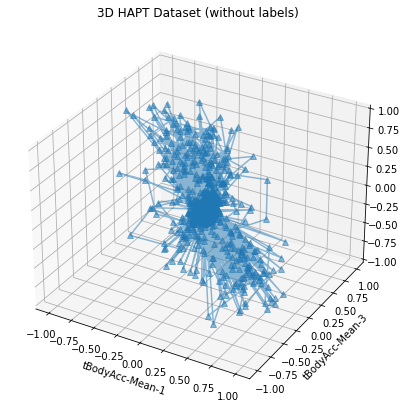

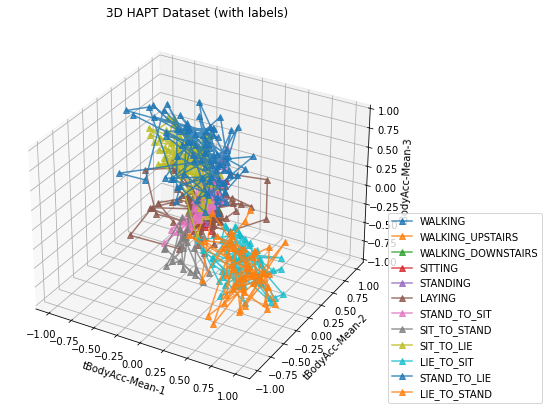

In [211]:
# 选取三个属性画图
i, j, k = 0, 1, 2
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
plt.title('3D HAPT Dataset (without labels)')
plt.plot(X[:, i], X[:, j], X[:, k], marker='^', alpha=.5)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.ylabel(attributeNames[k])
plt.show()

fig = plt.figure(figsize=(7,7))
ax2 = fig.add_subplot(111, projection='3d')
plt.title('3D HAPT Dataset (with labels)')
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(X[class_mask,i], X[class_mask,j], X[class_mask,k], marker='^',alpha=.8)
plt.legend(classNames,loc=[1, 0])
ax2.set_xlabel(attributeNames[i])
ax2.set_ylabel(attributeNames[j])
ax2.set_zlabel(attributeNames[k])
plt.show()


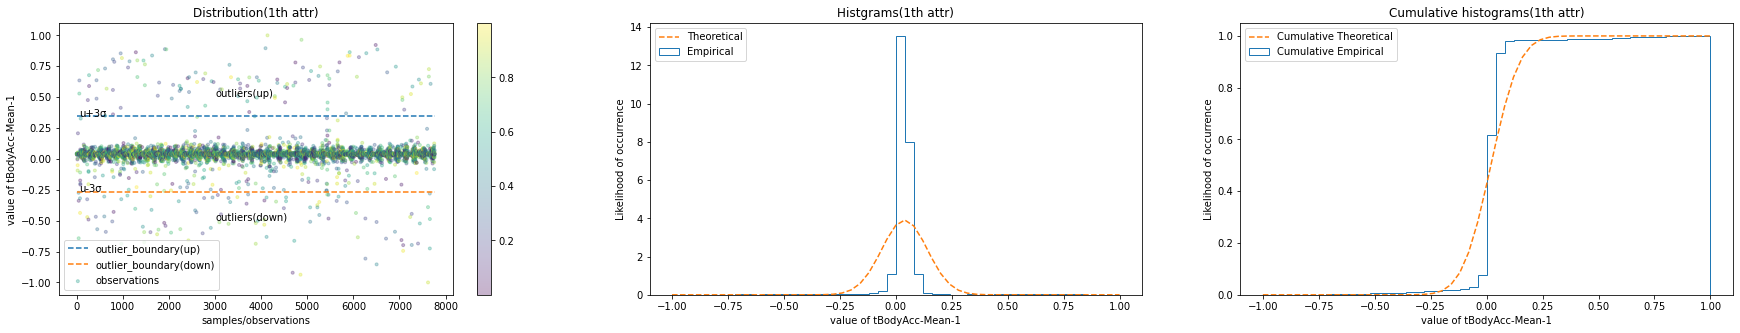

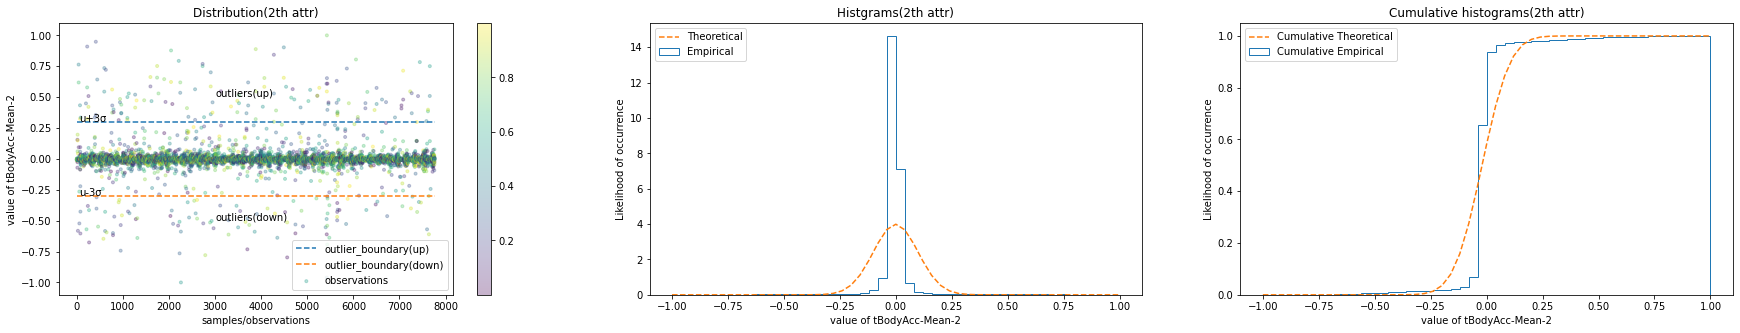

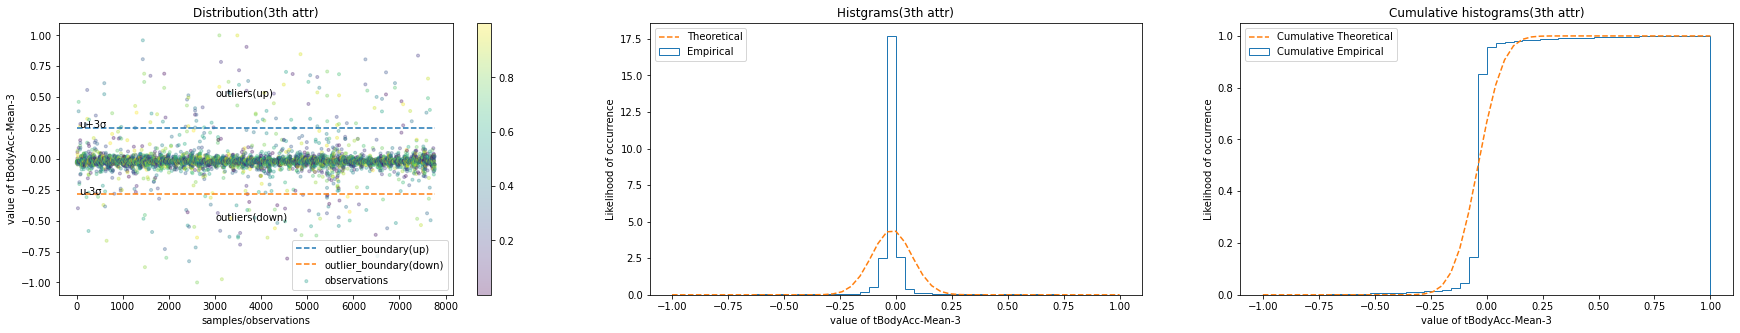

In [317]:
# 绘制前几个属性的分布情况，检测离群值
rng = np.random.RandomState(0)
colors = rng.rand(7767)
c = 3
for i in range(c):

    fig = plt.figure(figsize=(30,5))
    plt.subplot(1,3,1)
    plt.title('Distribution({:d}th attr)'.format(i+1))
    plt.scatter(range(X.shape[0]),X[:,i],marker='.',c=colors, cmap='viridis', alpha=0.3)
    threshold_up = X[:,i].mean() + 3 * X[:,i].std()
    threshold_down = X[:,i].mean() - 3 * X[:,i].std()
    plt.plot([1,X.shape[0]],[threshold_up,threshold_up],'--')
    plt.plot([1,X.shape[0]],[threshold_down,threshold_down],'--')
    plt.legend(['outlier_boundary(up)','outlier_boundary(down)','observations'])
    plt.xlabel('samples/observations')
    plt.ylabel('value of ' + attributeNames[i])
    plt.annotate('outliers(up)',xy=(3000,0.5))
    plt.annotate('outliers(down)',xy=(3000,-0.5))
    plt.annotate('u+3σ',xy=(50,threshold_up))
    plt.annotate('u-3σ',xy=(50,threshold_down))
    plt.colorbar()
    # 绘制直方图和正态分布
    plt.subplot(1,3,2)
    plt.title('Histgrams({:d}th attr)'.format(i+1))
    mu = X[:,i].mean()
    sigma = X[:,i].std()
    n, bins, patches = plt.hist(X[:,i], 50, density=True, histtype='step', label='Empirical')
    prob = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    plt.plot(bins, prob, '--', linewidth=1.5, label='Theoretical')
    plt.legend(loc='upper left')
    plt.xlabel('value of ' + attributeNames[i])
    plt.ylabel('Likelihood of occurrence')

    plt.subplot(1,3,3)
    plt.title('Cumulative histograms({:d}th attr)'.format(i+1))
    n, bins, patches = plt.hist(X[:,i], 50, density=True, histtype='step', cumulative=True, label='Cumulative Empirical')
    prob = prob.cumsum()
    prob /= prob[-1]
    plt.plot(bins, prob, '--', linewidth=1.5, label='Cumulative Theoretical')
    plt.legend(loc='upper left')
    plt.xlabel('value of ' + attributeNames[i])
    plt.ylabel('Likelihood of occurrence')
    
    plt.show()


(7767, 561)
U.shape (7767, 561)
S.shape (561,)
V.shape (561, 561)
Z.shape (7767, 561)


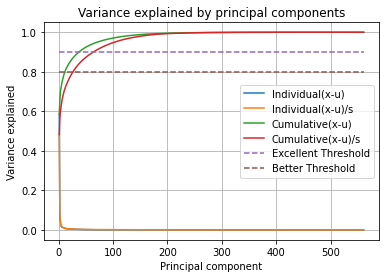

[[31, 0.8873594778190057],
 [32, 0.8899635104341032],
 [33, 0.8924989388921793],
 [34, 0.8949960132772765],
 [35, 0.8974415162459266],
 [36, 0.8998305066178731],
 [37, 0.9020853728376582],
 [38, 0.9043153816554277],
 [39, 0.9064967357050275],
 [40, 0.908572768339549]]

In [122]:
X_normal = X - X.mean(axis=0)
print(X_normal.shape)
N, M = X_normal.shape

# method1 normalization
U,S,VT = svd(X_normal,full_matrices=False)
V = VT.T
rho = (S*S) / (S*S).sum()
Z = X_normal @ V
# method2 normalization
X_normal_std = (X - X.mean(axis=0))/X.std(axis=0)
U1,S1,VT1 = svd(X_normal_std,full_matrices=False)
V1 = VT1.T
rho1 = (S1*S1) / (S1*S1).sum()
Z1 = X_normal_std @ V1

print("U.shape",U.shape)
print("S.shape",S.shape)
print("V.shape",V.shape)
print("Z.shape",Z.shape)

## Plot variance explained
threshold_upper, threshold_lower = 0.9, 0.8
plt.figure(figsize=(6,4))
plt.plot(range(1,len(rho)+1),rho,'-')                  # 绘制各在成分上投影的方差
plt.plot(range(1,len(rho1)+1),rho1,'-')                  # 绘制各在成分上投影的方差
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'-')       # 绘制各成分累加的可解释变异或课解释方差
plt.plot(range(1,len(rho1)+1),np.cumsum(rho1),'-')       # 绘制各成分累加的可解释变异或课解释方差
plt.plot([1,len(rho)],[threshold_upper, threshold_upper],'--')     # 绘制压缩要求阈值
plt.plot([1,len(rho)],[threshold_lower, threshold_lower],'--')     # 绘制压缩要求阈值
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual(x-u)','Individual(x-u)/s','Cumulative(x-u)','Cumulative(x-u)/s','Excellent Threshold', 'Better Threshold'])
plt.grid()
plt.show()

# # a = np.sort(x_train[:,0])
# # print(a)
# # print(a[:3])
# # print(a[-3:])
rho_dic = [[i,v] for i, v in enumerate(np.cumsum(rho))]
rho_dic[31:41]


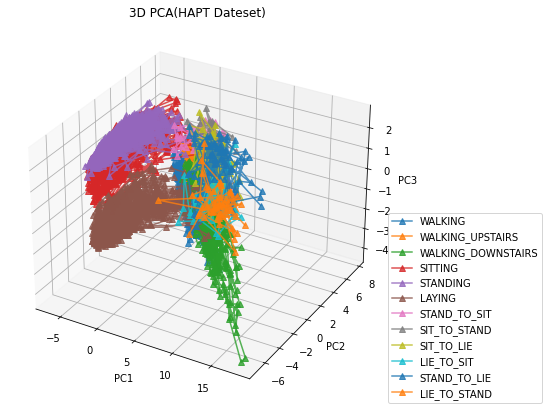

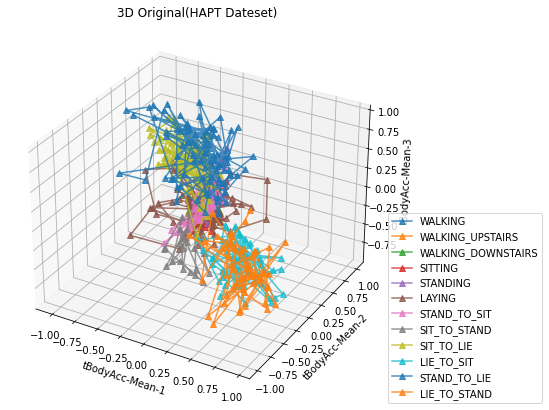

In [121]:
# pca和原始数据3D图
# Indices of the principal components to be plotted
i = 0 # 第一主成分
j = 1 # 第二主成分
k = 2 # 第三主成分
# Z = array(Z)

# Plot PCA of the data
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
plt.title('3D PCA(HAPT Dateset)')
# marker_lib = ['o','v','s','P','*']
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(Z[class_mask,i], Z[class_mask,j], Z[class_mask,k], marker='^', alpha=.8)
plt.legend(classNames,loc=[1, 0])
ax1.set_xlabel('PC{0}'.format(i+1))
ax1.set_ylabel('PC{0}'.format(j+1))
ax1.set_zlabel('PC{0}'.format(k+1))
plt.show()
# Plot first 3 attributes of the data
fig = plt.figure(figsize=(7,7))
ax2 = fig.add_subplot(111, projection='3d')
plt.title('3D Original(HAPT Dateset)')
# 接上一部分，C是标签的数量，接上一部分
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(X_normal[class_mask,i], X_normal[class_mask,j], X_normal[class_mask,k], marker='^', alpha=.8)
plt.legend(classNames,loc=[1, 0])
ax2.set_xlabel(attributeNames[i])
ax2.set_ylabel(attributeNames[j])
ax2.set_zlabel(attributeNames[k])
plt.show()

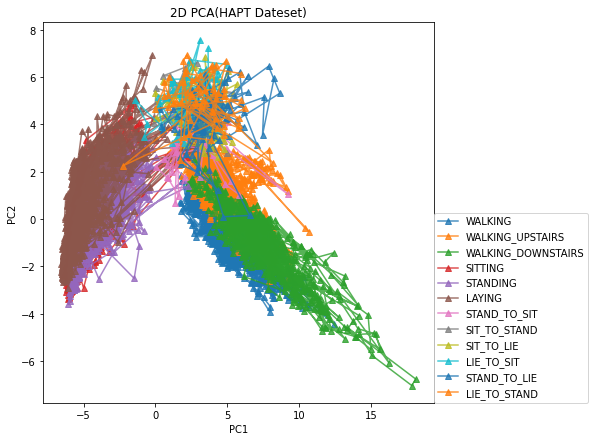

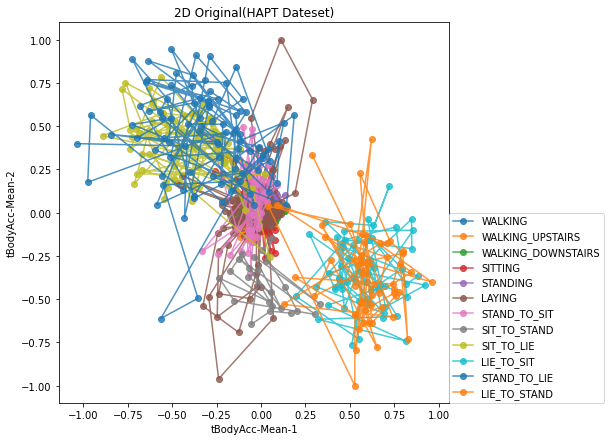

In [120]:
# pca和原始数据3D图
# Indices of the principal components to be plotted
i = 0 # 第一主成分
j = 1 # 第二主成分
# Z = array(Z)

# Plot PCA of the data
fig = plt.figure(figsize=(7,7))
plt.title('2D PCA(HAPT Dateset)')
# marker_lib = ['o','v','s','P','*']
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(Z[class_mask,i], Z[class_mask,j], marker='^', alpha=.8)
plt.legend(classNames,loc=[1, 0])
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.show()
# Plot first 3 attributes of the data
fig = plt.figure(figsize=(7,7))
plt.title('2D Original(HAPT Dateset)')
# 接上一部分，C是标签的数量，接上一部分
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plt.plot(X_normal[class_mask,i], X_normal[class_mask,j], marker='o', alpha=.8)
plt.legend(classNames,loc=[1, 0])
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

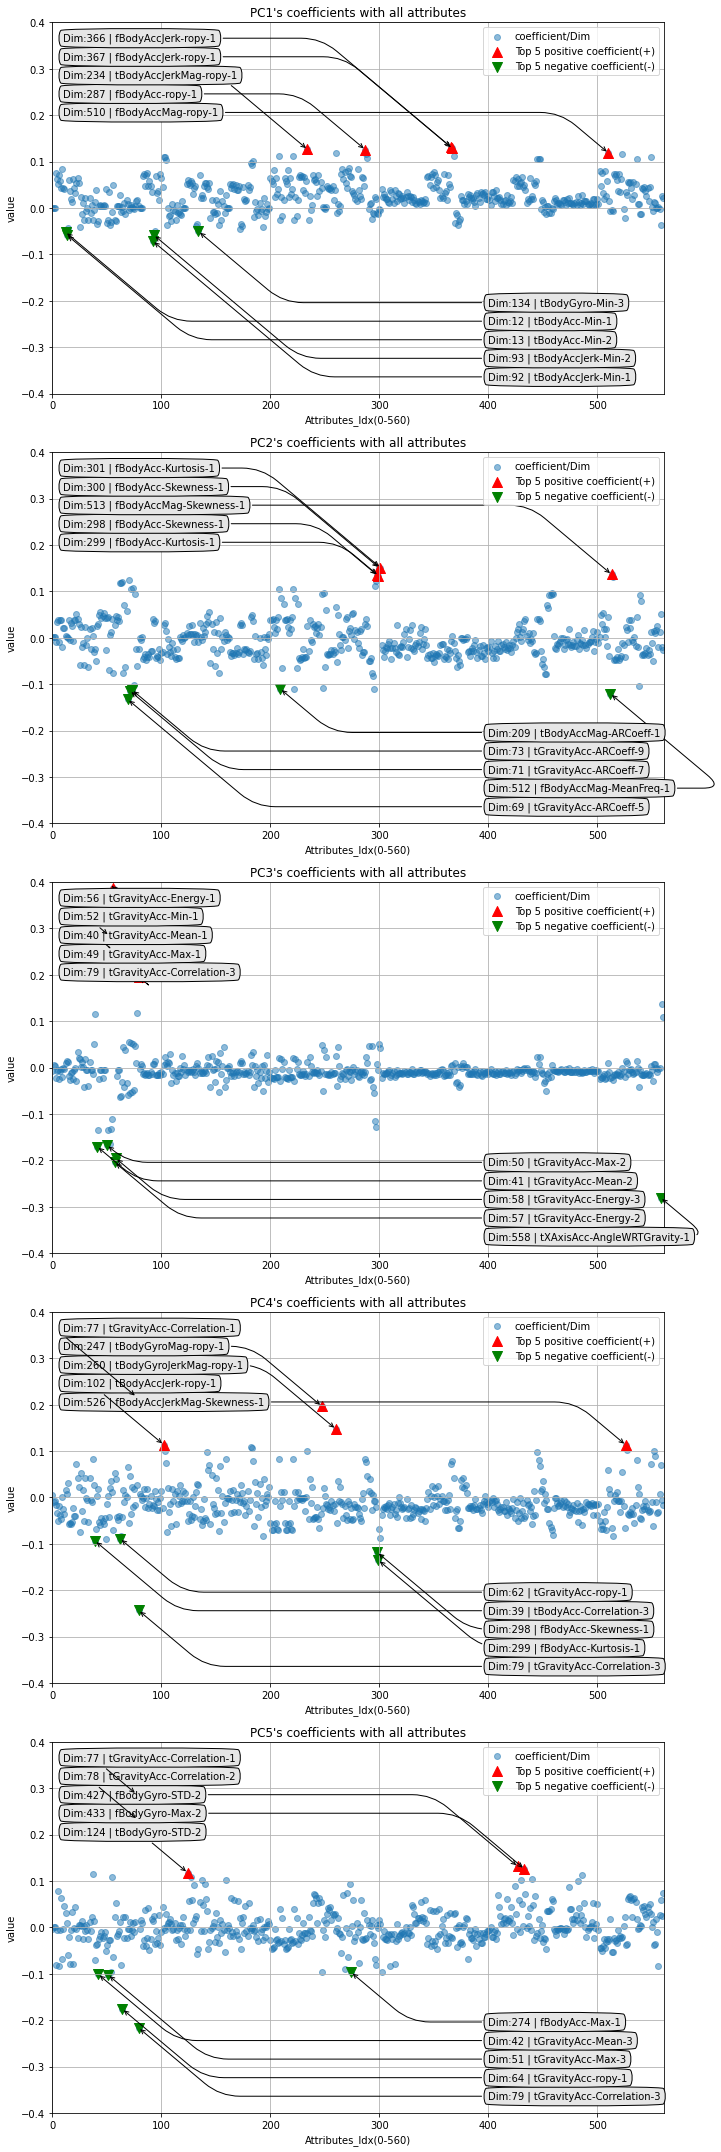

In [326]:
# show main direction of every compoment 
K = 37 # 选取37个主成分最好。
K = 5 # 展示前5个的
new_V = V[:,:K]

# plot pcs
f = plt.figure(figsize=(10,30))
for i in range(K):
    plt.subplot(K,1,i+1)
    # plt.bar(range(M), V[:,i], color='orange', width=.1 ,alpha=0.5)
    plt.scatter(range(M), V[:,i] ,marker='o', alpha=0.5)
    plt.title('PC{:d}\'s coefficients with all attributes'.format(i+1))
    plt.xlabel('Attributes_Idx(0-560)')
    plt.ylabel('value')
    # 标记最大的五个分量
    idx = new_V[:,i].argsort()
    max_five = idx[-5:]
    min_five = idx[:5]
    new_data = np.array([0.0 for i in range(len(new_V[:,i]))])
    new_data[max_five] = new_V[:,i][max_five]
    new_data[min_five] = new_V[:,i][min_five]
    plt.scatter(max_five,new_data[max_five],marker='^',s=100,c='r')
    plt.scatter(min_five,new_data[min_five],marker='v',s=100,c='g')
    plt.legend(['coefficient/Dim','Top 5 positive coefficient(+)','Top 5 negative coefficient(-)'])
    plt.axis([0,561,-0.4,0.4])
    # 给散点图加标记最大的特征方向
    for i in range(5):
        plt.annotate('Dim:{:d} | '.format(max_five[i])+attributeNames[max_five[i]],xy=(max_five[i],new_data[max_five][i]),
        xytext=(10,0.20+0.04*i),bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=140,rad=20"))
    # 给散点图加标记最大的特征方向
    for i in range(5):
        plt.annotate('Dim:{:d} | '.format(min_five[i])+attributeNames[min_five[i]],xy=(min_five[i],new_data[min_five][i]),
        xytext=(400,-0.37+0.04*i),bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=140,rad=20"))
    plt.grid()
plt.tight_layout()

plt.show()